/var/folders/1f/v2ws8crn4c34nx9fvpdjdb2c0000gn/T/ipykernel_39364/2025195170.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


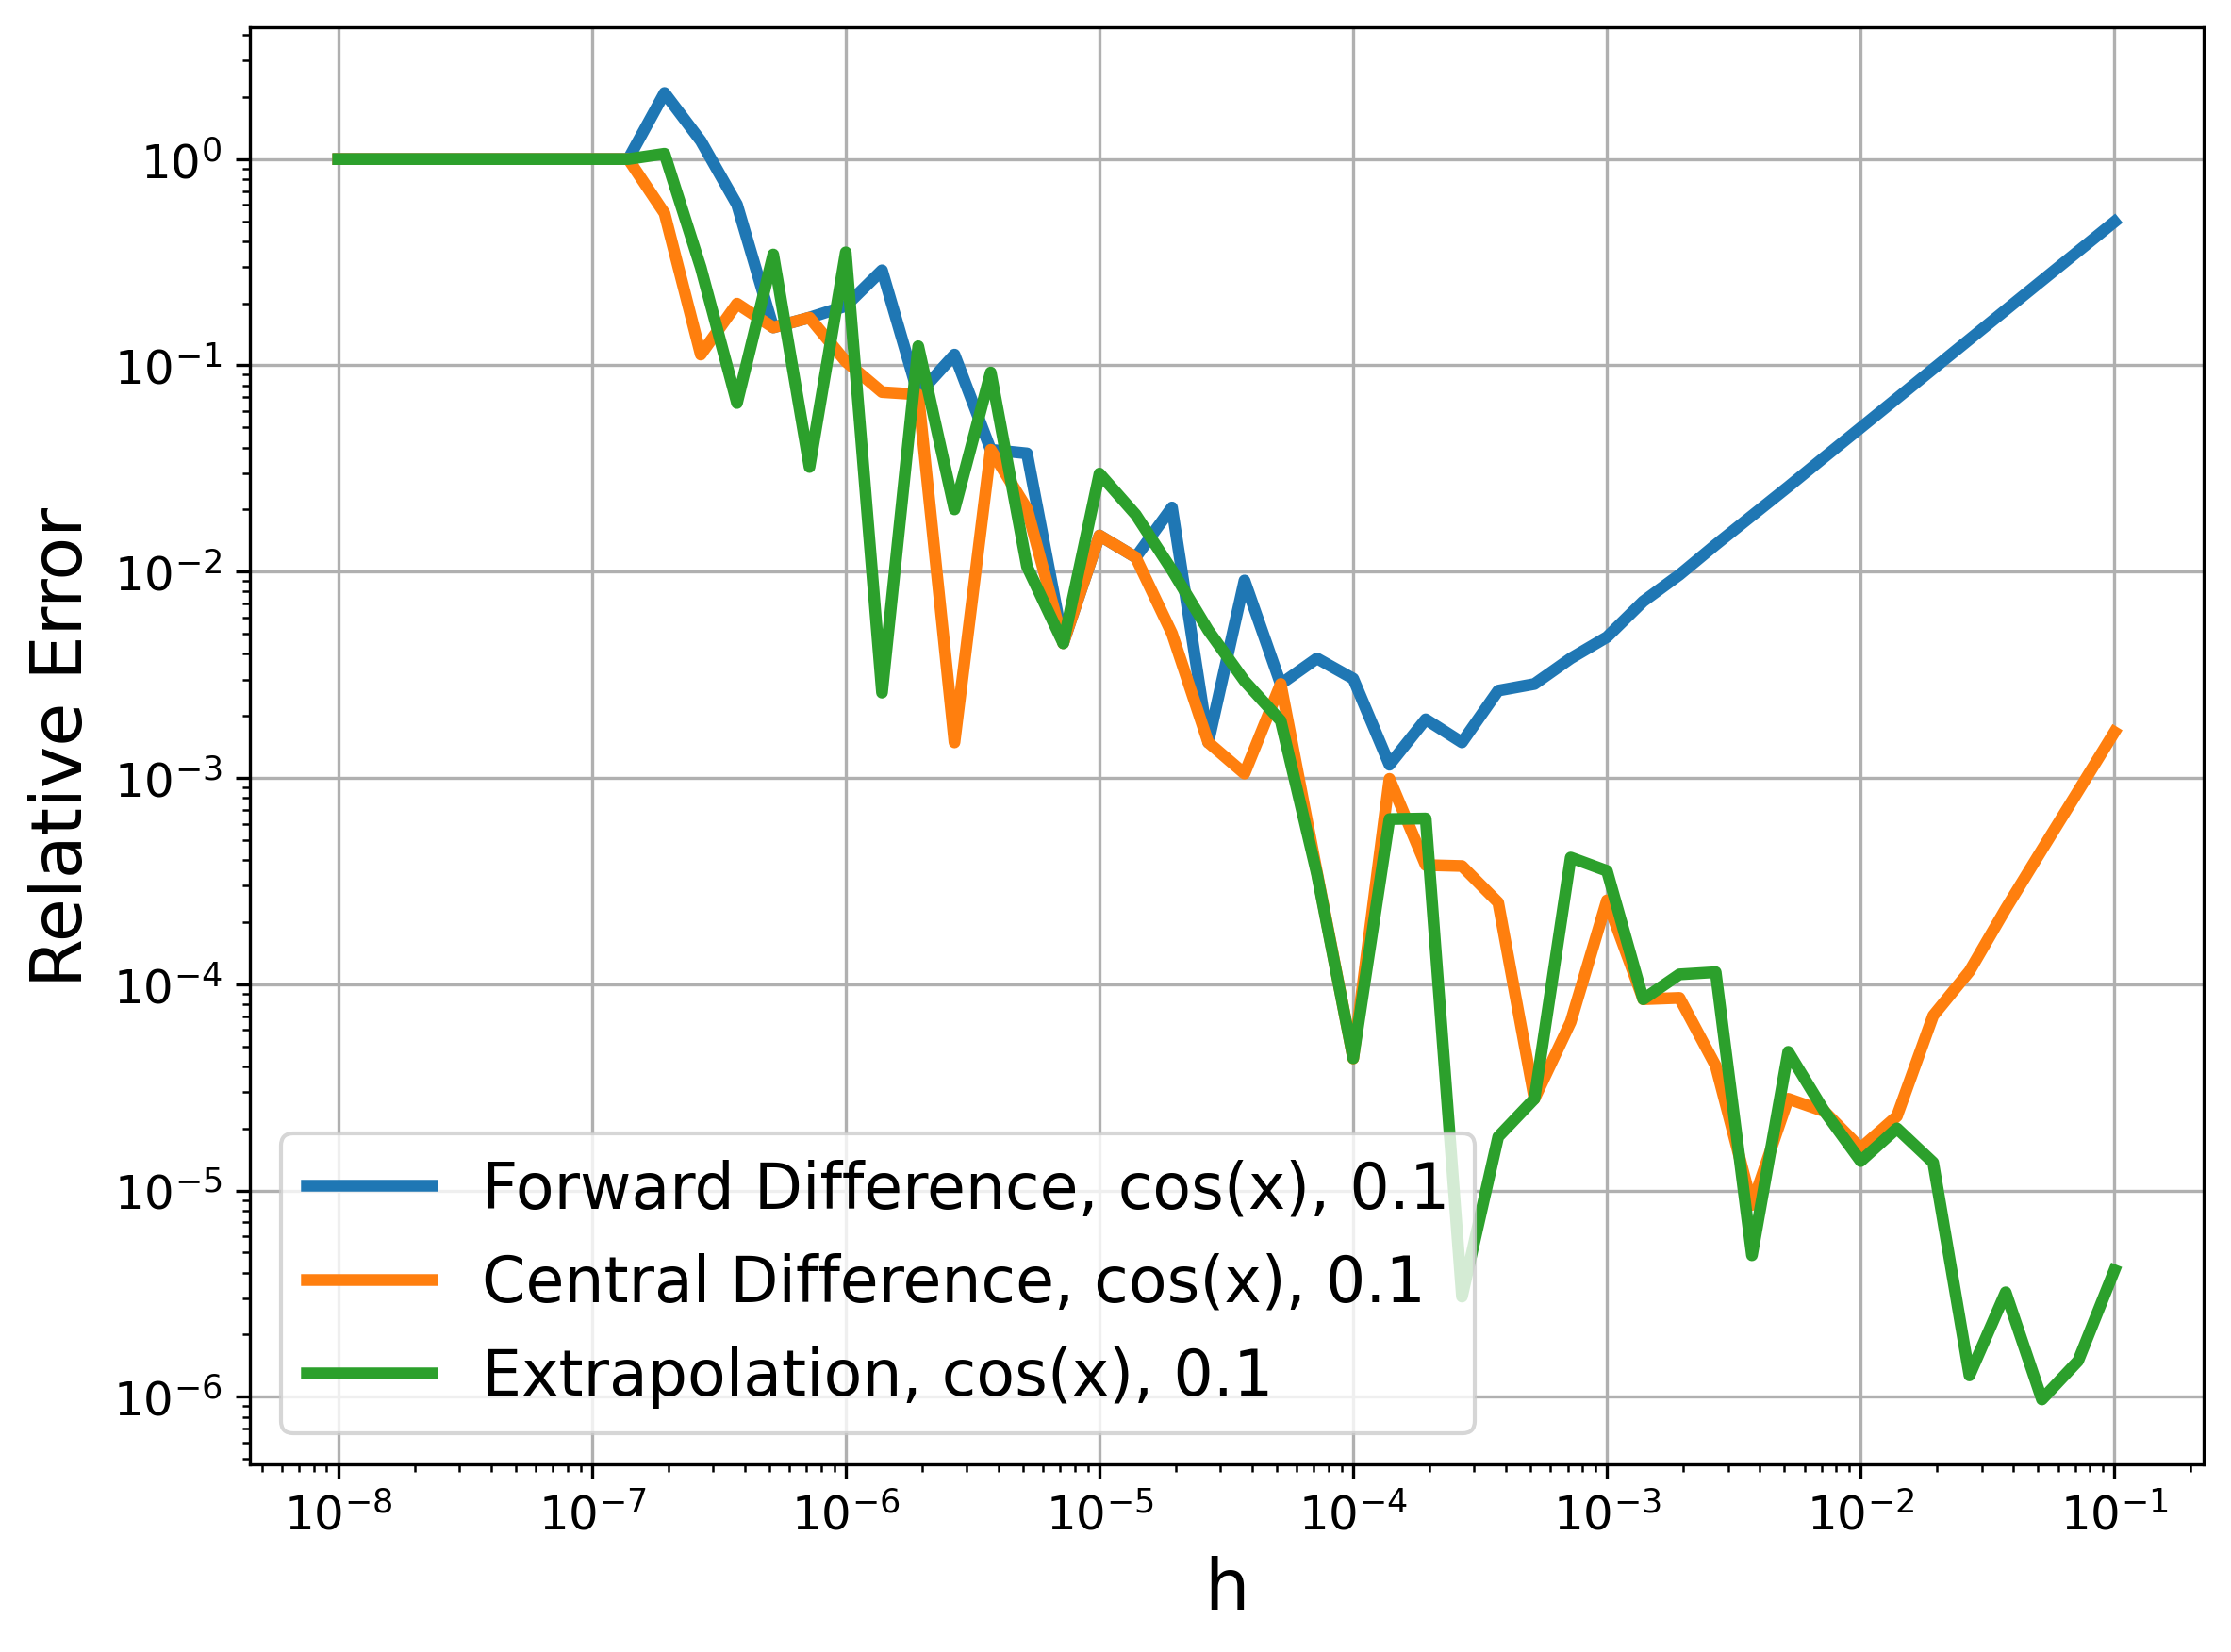

In [2]:
# Problem 1

import numpy as np
from matplotlib import pyplot as plt

def forward_dif(f,x,h):
    return np.float32((f(x+h)-f(x))/h)

def central_dif(f,x,h):
    return np.float32((f(x+h)-f(x-h))/(2*h))

def extrap(f,x,h):
    return np.float32(1/(12*h) * (-f(x+2*h)+8*f(x+h)-8*f(x-h)+f(x-2*h)))

# write true derivatives at each point
x1 = np.float32(0.1)
x2 = np.float32(10)
dcos_01 = -np.sin(x1)
dexp_01 = np.exp(x1)
dcos_10 = -np.sin(x2)
dexp_10 = np.exp(x2)

# set arrays
h = np.logspace(-8,-1,dtype=np.float32)
cos_f_ds = np.zeros(len(h))
cos_c_ds = np.zeros(len(h))
cos_e_ds = np.zeros(len(h))
e_f_ds = np.zeros(len(h))
e_c_ds = np.zeros(len(h))
e_e_ds = np.zeros(len(h))
err_cf = np.zeros(len(h))
err_cc = np.zeros(len(h))
err_ce = np.zeros(len(h))
err_ef = np.zeros(len(h))
err_ec = np.zeros(len(h))
err_ee = np.zeros(len(h))

# loop over step sizes
for i in range(len(h)):
    h[i] = np.float32(h[i])
    cos_f_ds[i] = forward_dif(np.cos,x1,h[i])
    err_cf[i] = np.abs((cos_f_ds[i] - dcos_01)/dcos_01)
    
    cos_c_ds[i] = central_dif(np.cos,x1,h[i])
    err_cc[i] = np.abs((cos_c_ds[i] - dcos_01)/dcos_01)
    
    cos_e_ds[i] = extrap(np.cos,x1,h[i])
    err_ce[i] = np.abs((cos_e_ds[i] - dcos_01)/dcos_01)
    
    e_f_ds[i] = forward_dif(np.exp,x1,h[i])
    err_ef[i] = np.abs((e_f_ds[i] - dexp_01)/dexp_01)
    
    e_c_ds[i] = central_dif(np.exp,x1,h[i])
    err_ec[i] = np.abs((e_c_ds[i] - dexp_01)/dexp_01)
    
    e_e_ds[i] = extrap(np.exp,x1,h[i])
    err_ee[i] = np.abs((e_e_ds[i] - dexp_01)/dexp_01)


plt.figure(figsize=(8,6),dpi=300)
plt.xlabel("N",fontsize=18)
plt.ylabel(r'$\epsilon$',fontsize=18)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.grid(True)
plt.loglog(h,err_cf,label='Forward Difference, cos(x), 0.1',lw=3)
plt.loglog(h,err_cc,label='Central Difference, cos(x), 0.1',lw=3)
plt.loglog(h,err_ce,label='Extrapolation, cos(x), 0.1',lw=3)
plt.xlabel("h",fontsize=18)
plt.ylabel("Relative Error",fontsize=18)
plt.legend(fontsize=16)
plt.savefig("dif_cos_01.png")

/var/folders/1f/v2ws8crn4c34nx9fvpdjdb2c0000gn/T/ipykernel_39364/20227393.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


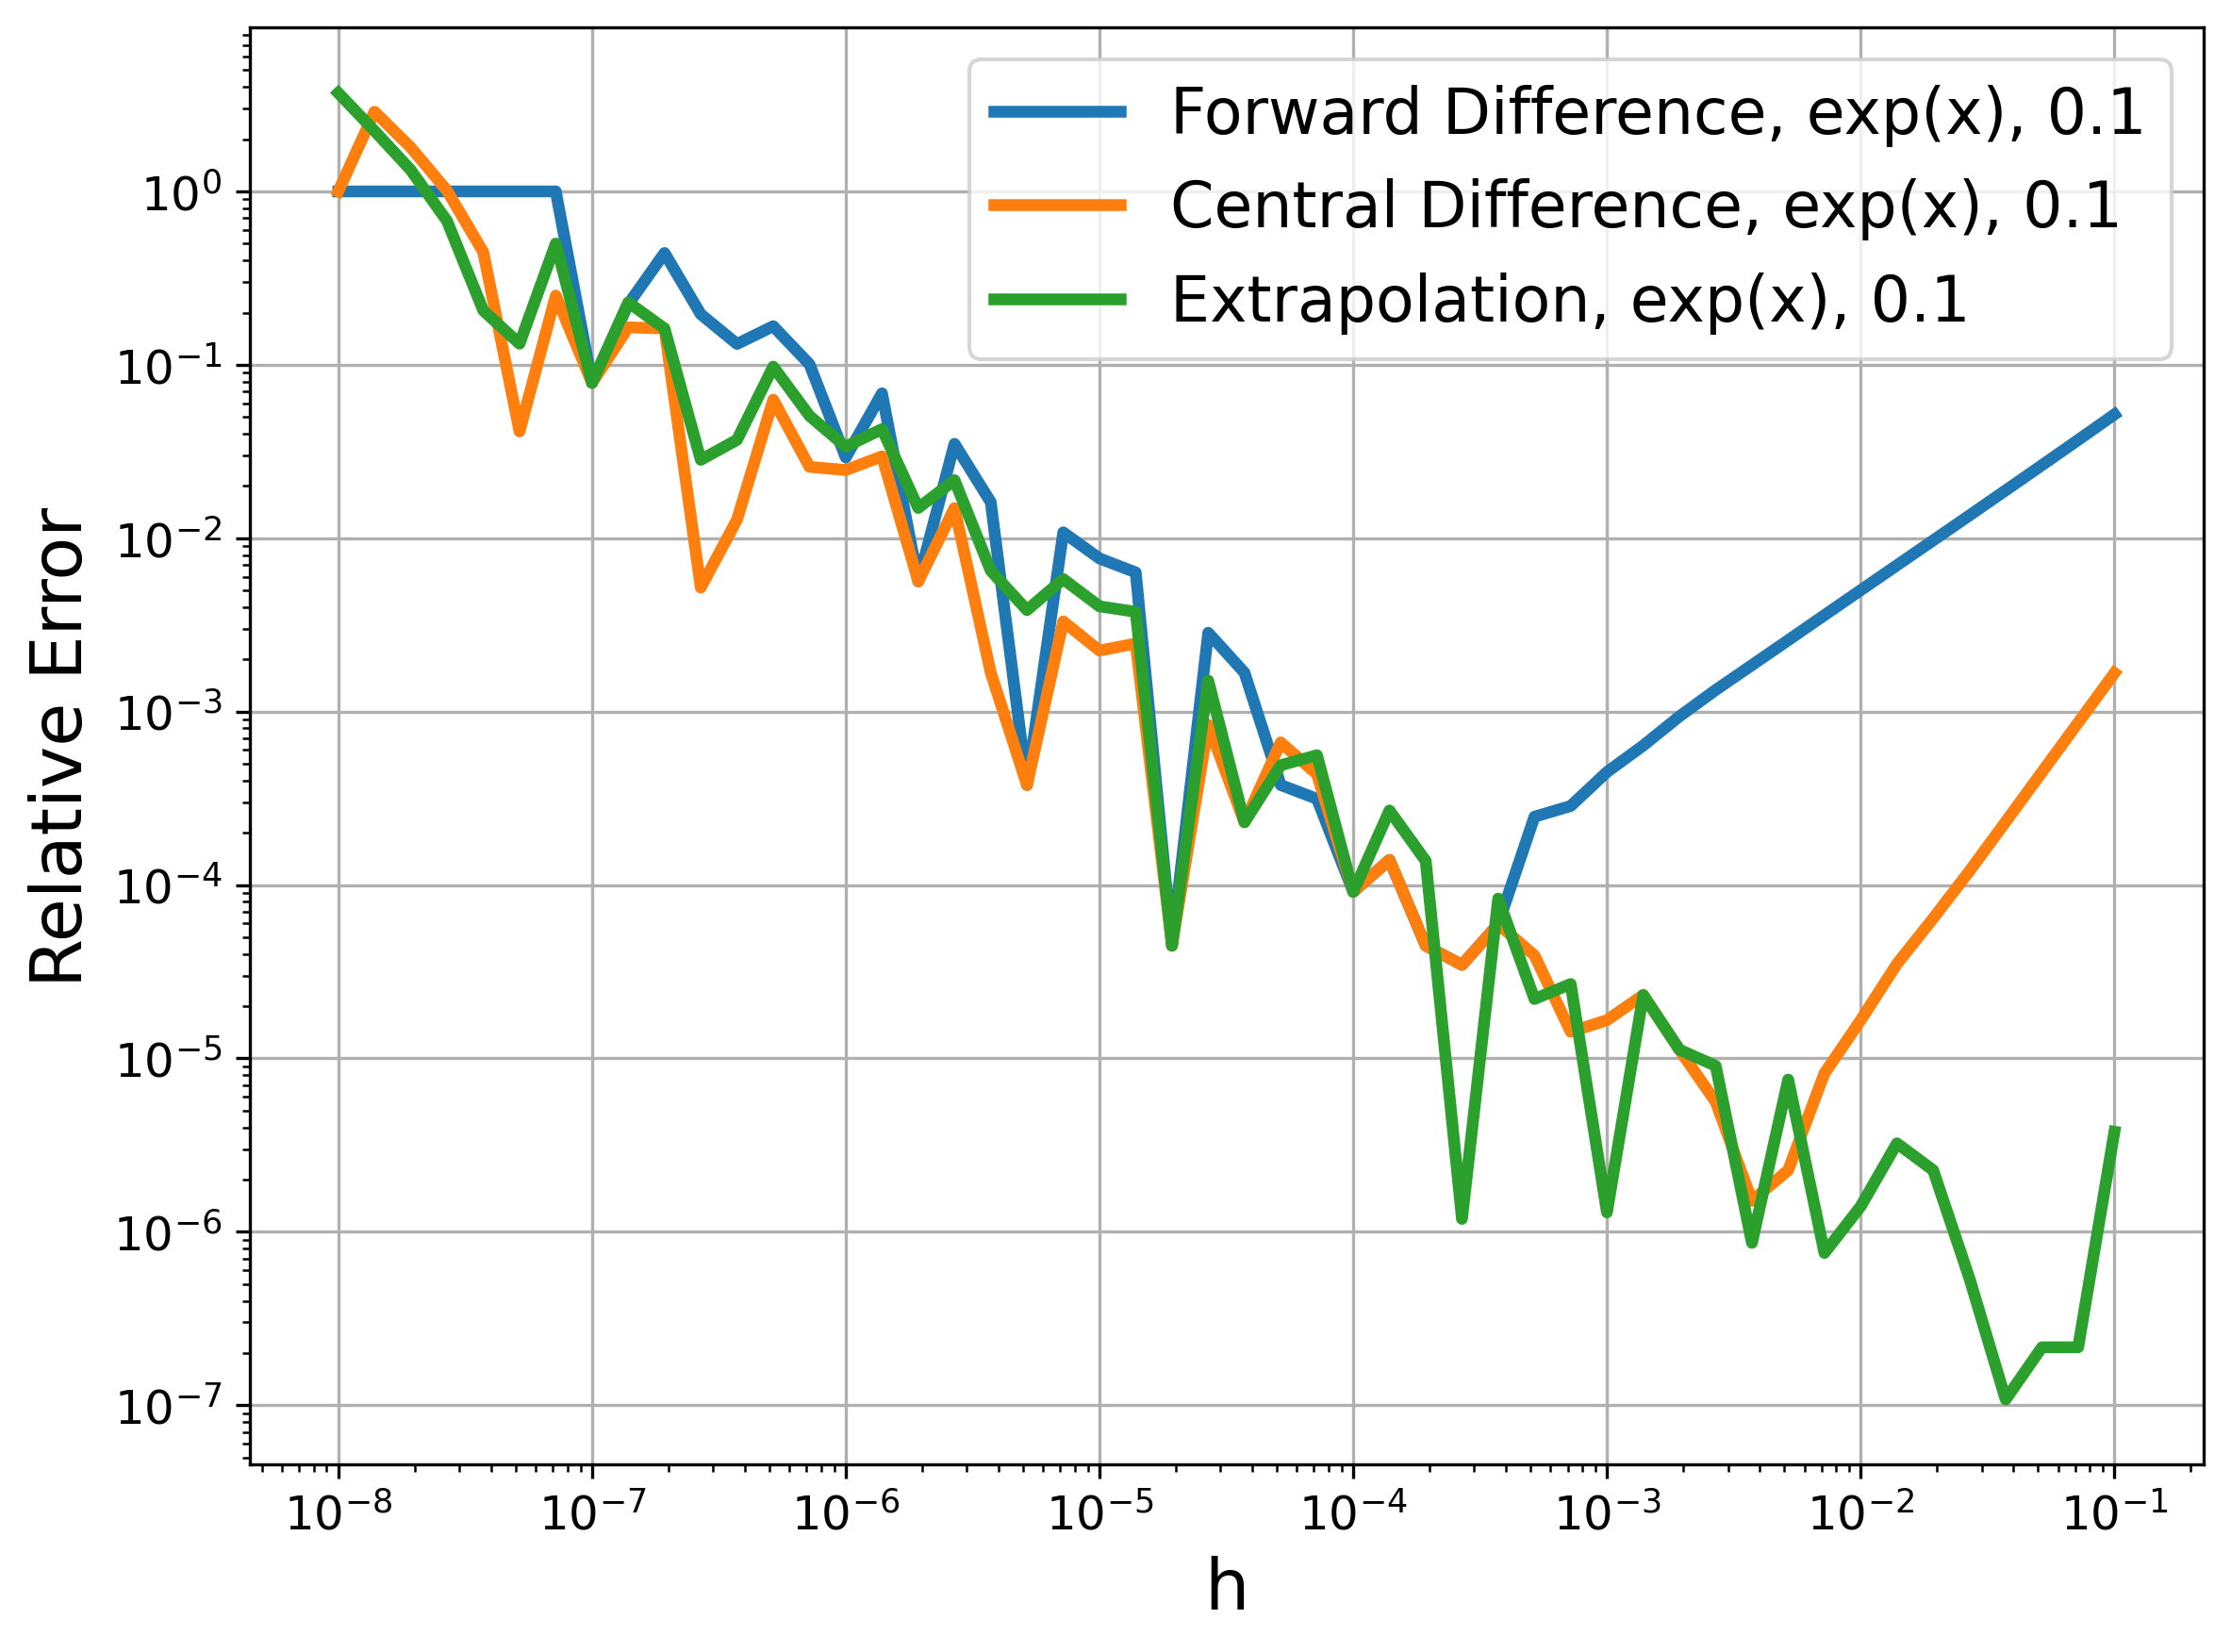

In [3]:
plt.figure(figsize=(8,6),dpi=300)
plt.xlabel("N",fontsize=18)
plt.ylabel(r'$\epsilon$',fontsize=18)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.grid(True)
plt.loglog(h,err_ef,label='Forward Difference, exp(x), 0.1',lw=3)
plt.loglog(h,err_ec,label='Central Difference, exp(x), 0.1',lw=3)
plt.loglog(h,err_ee,label='Extrapolation, exp(x), 0.1',lw=3)
plt.xlabel("h",fontsize=18)
plt.ylabel("Relative Error",fontsize=18)
plt.legend(fontsize=16)
plt.savefig("dif_exp_01.png")

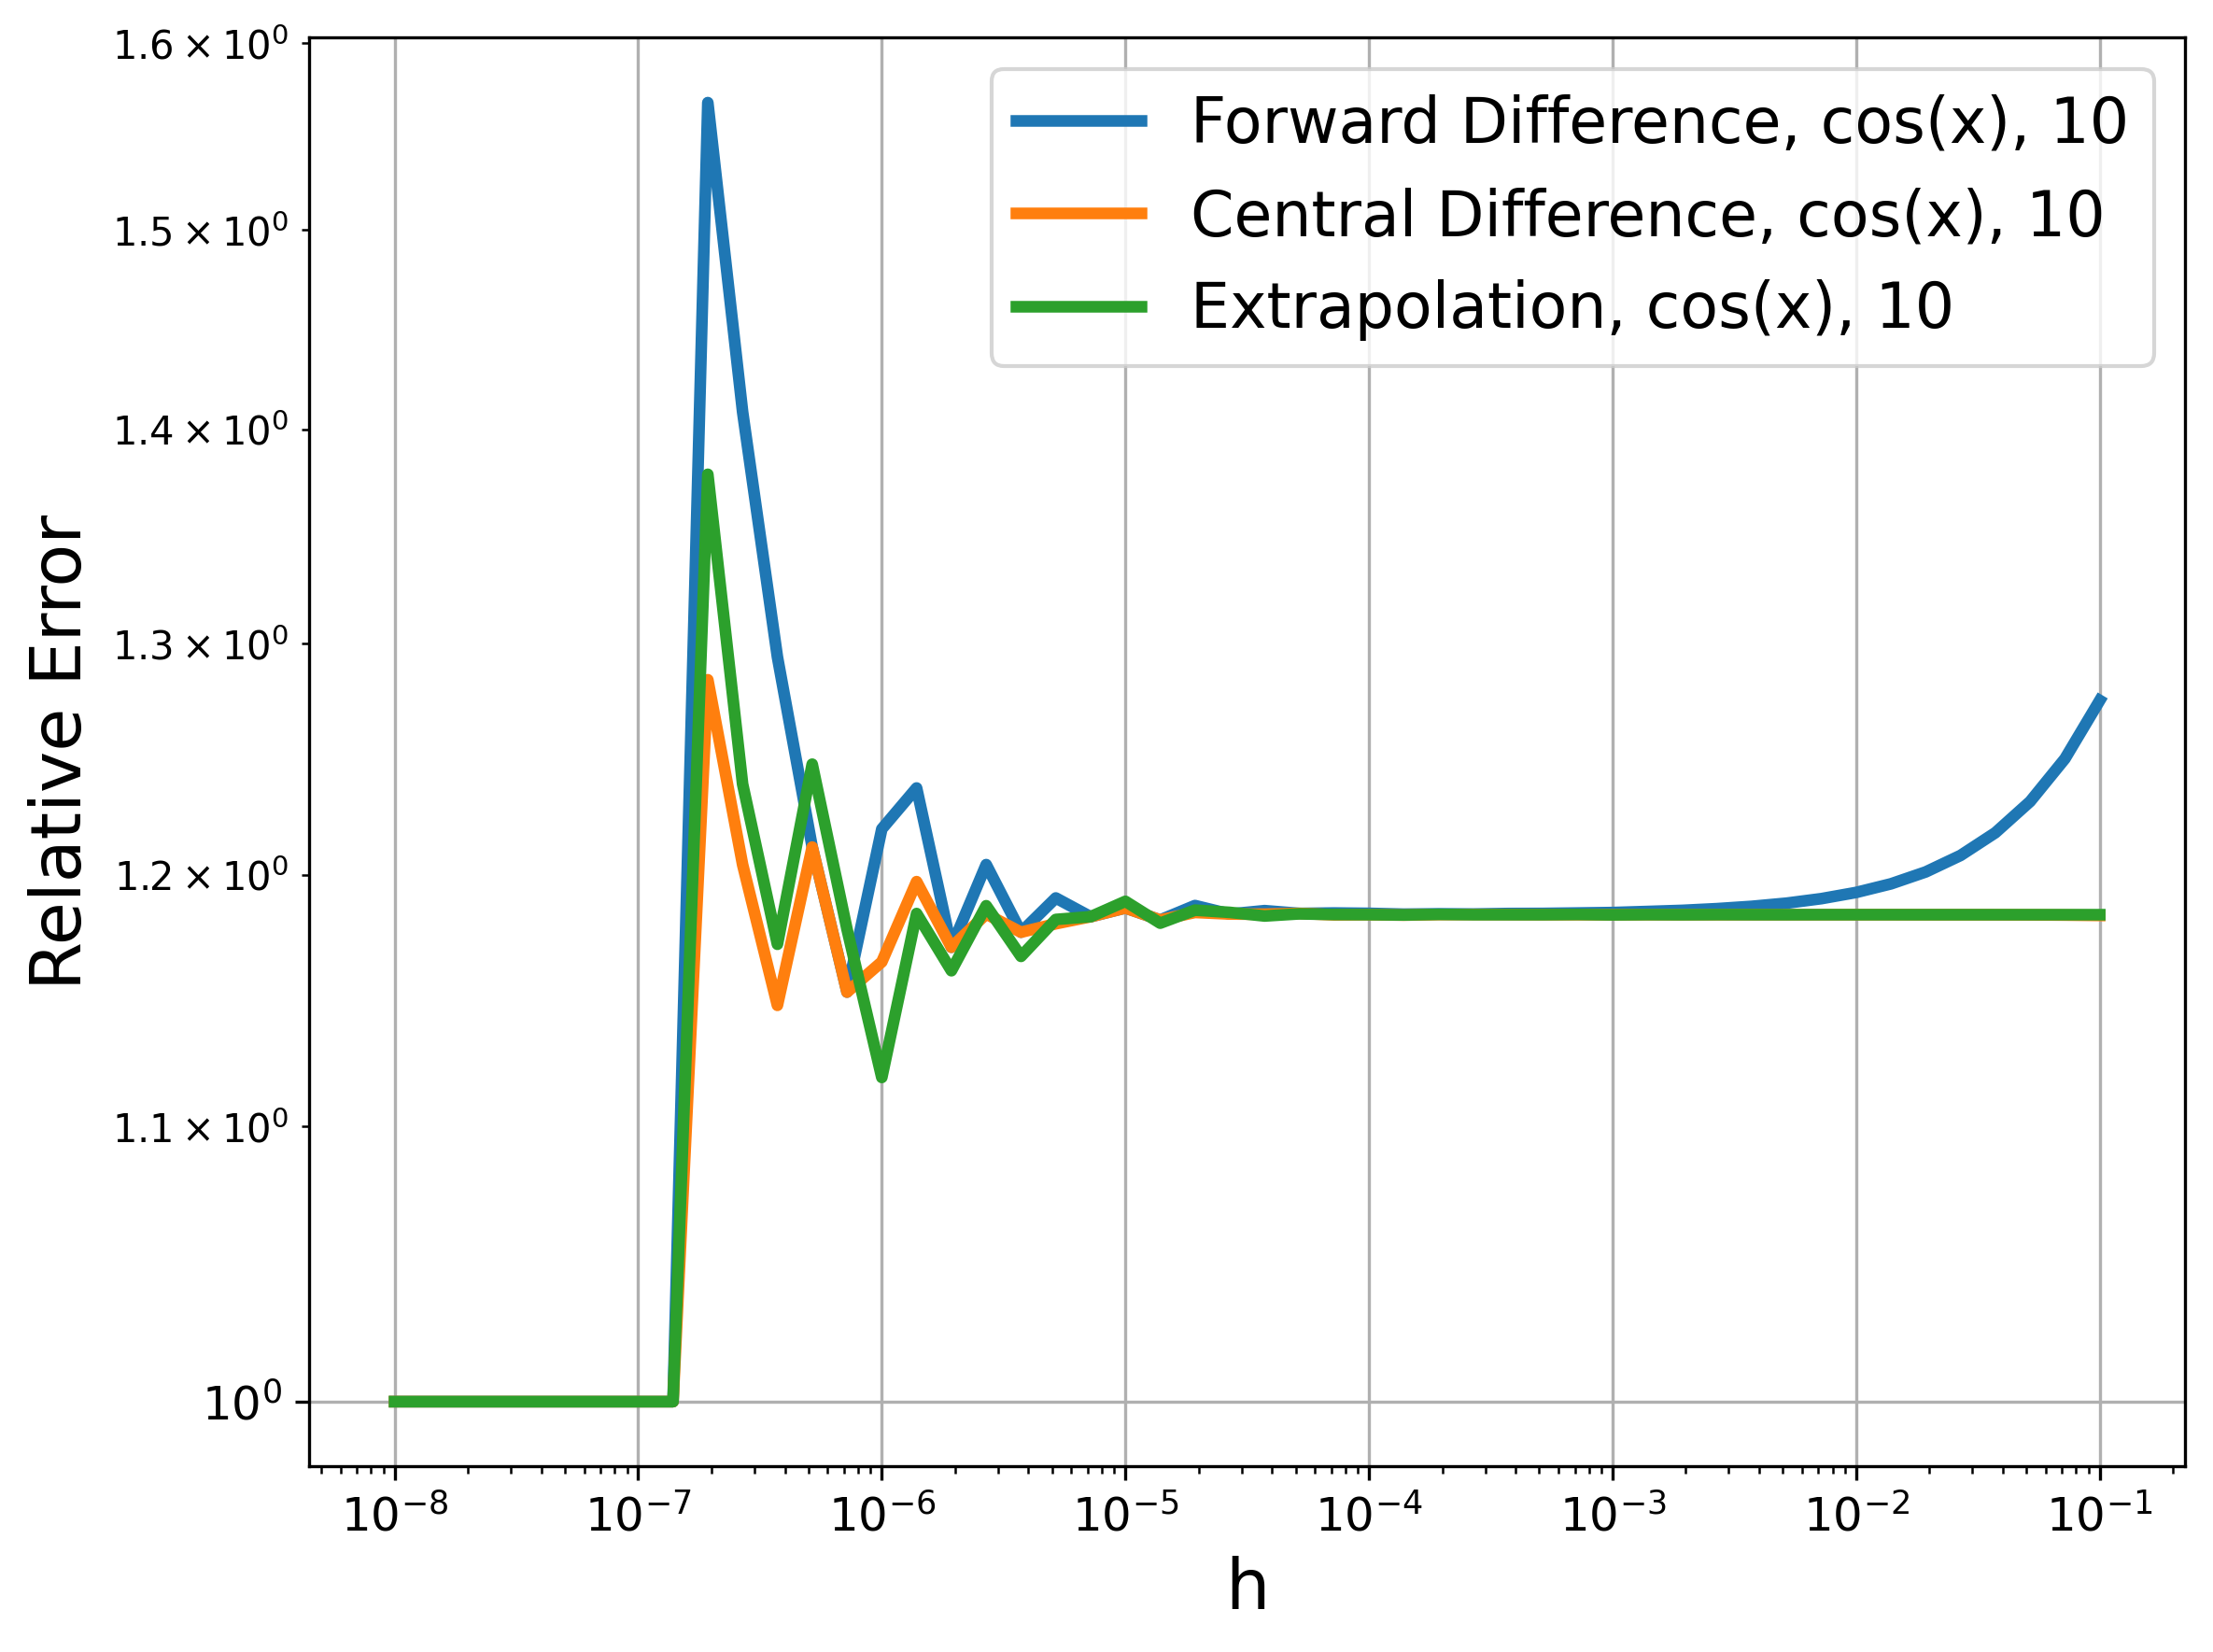

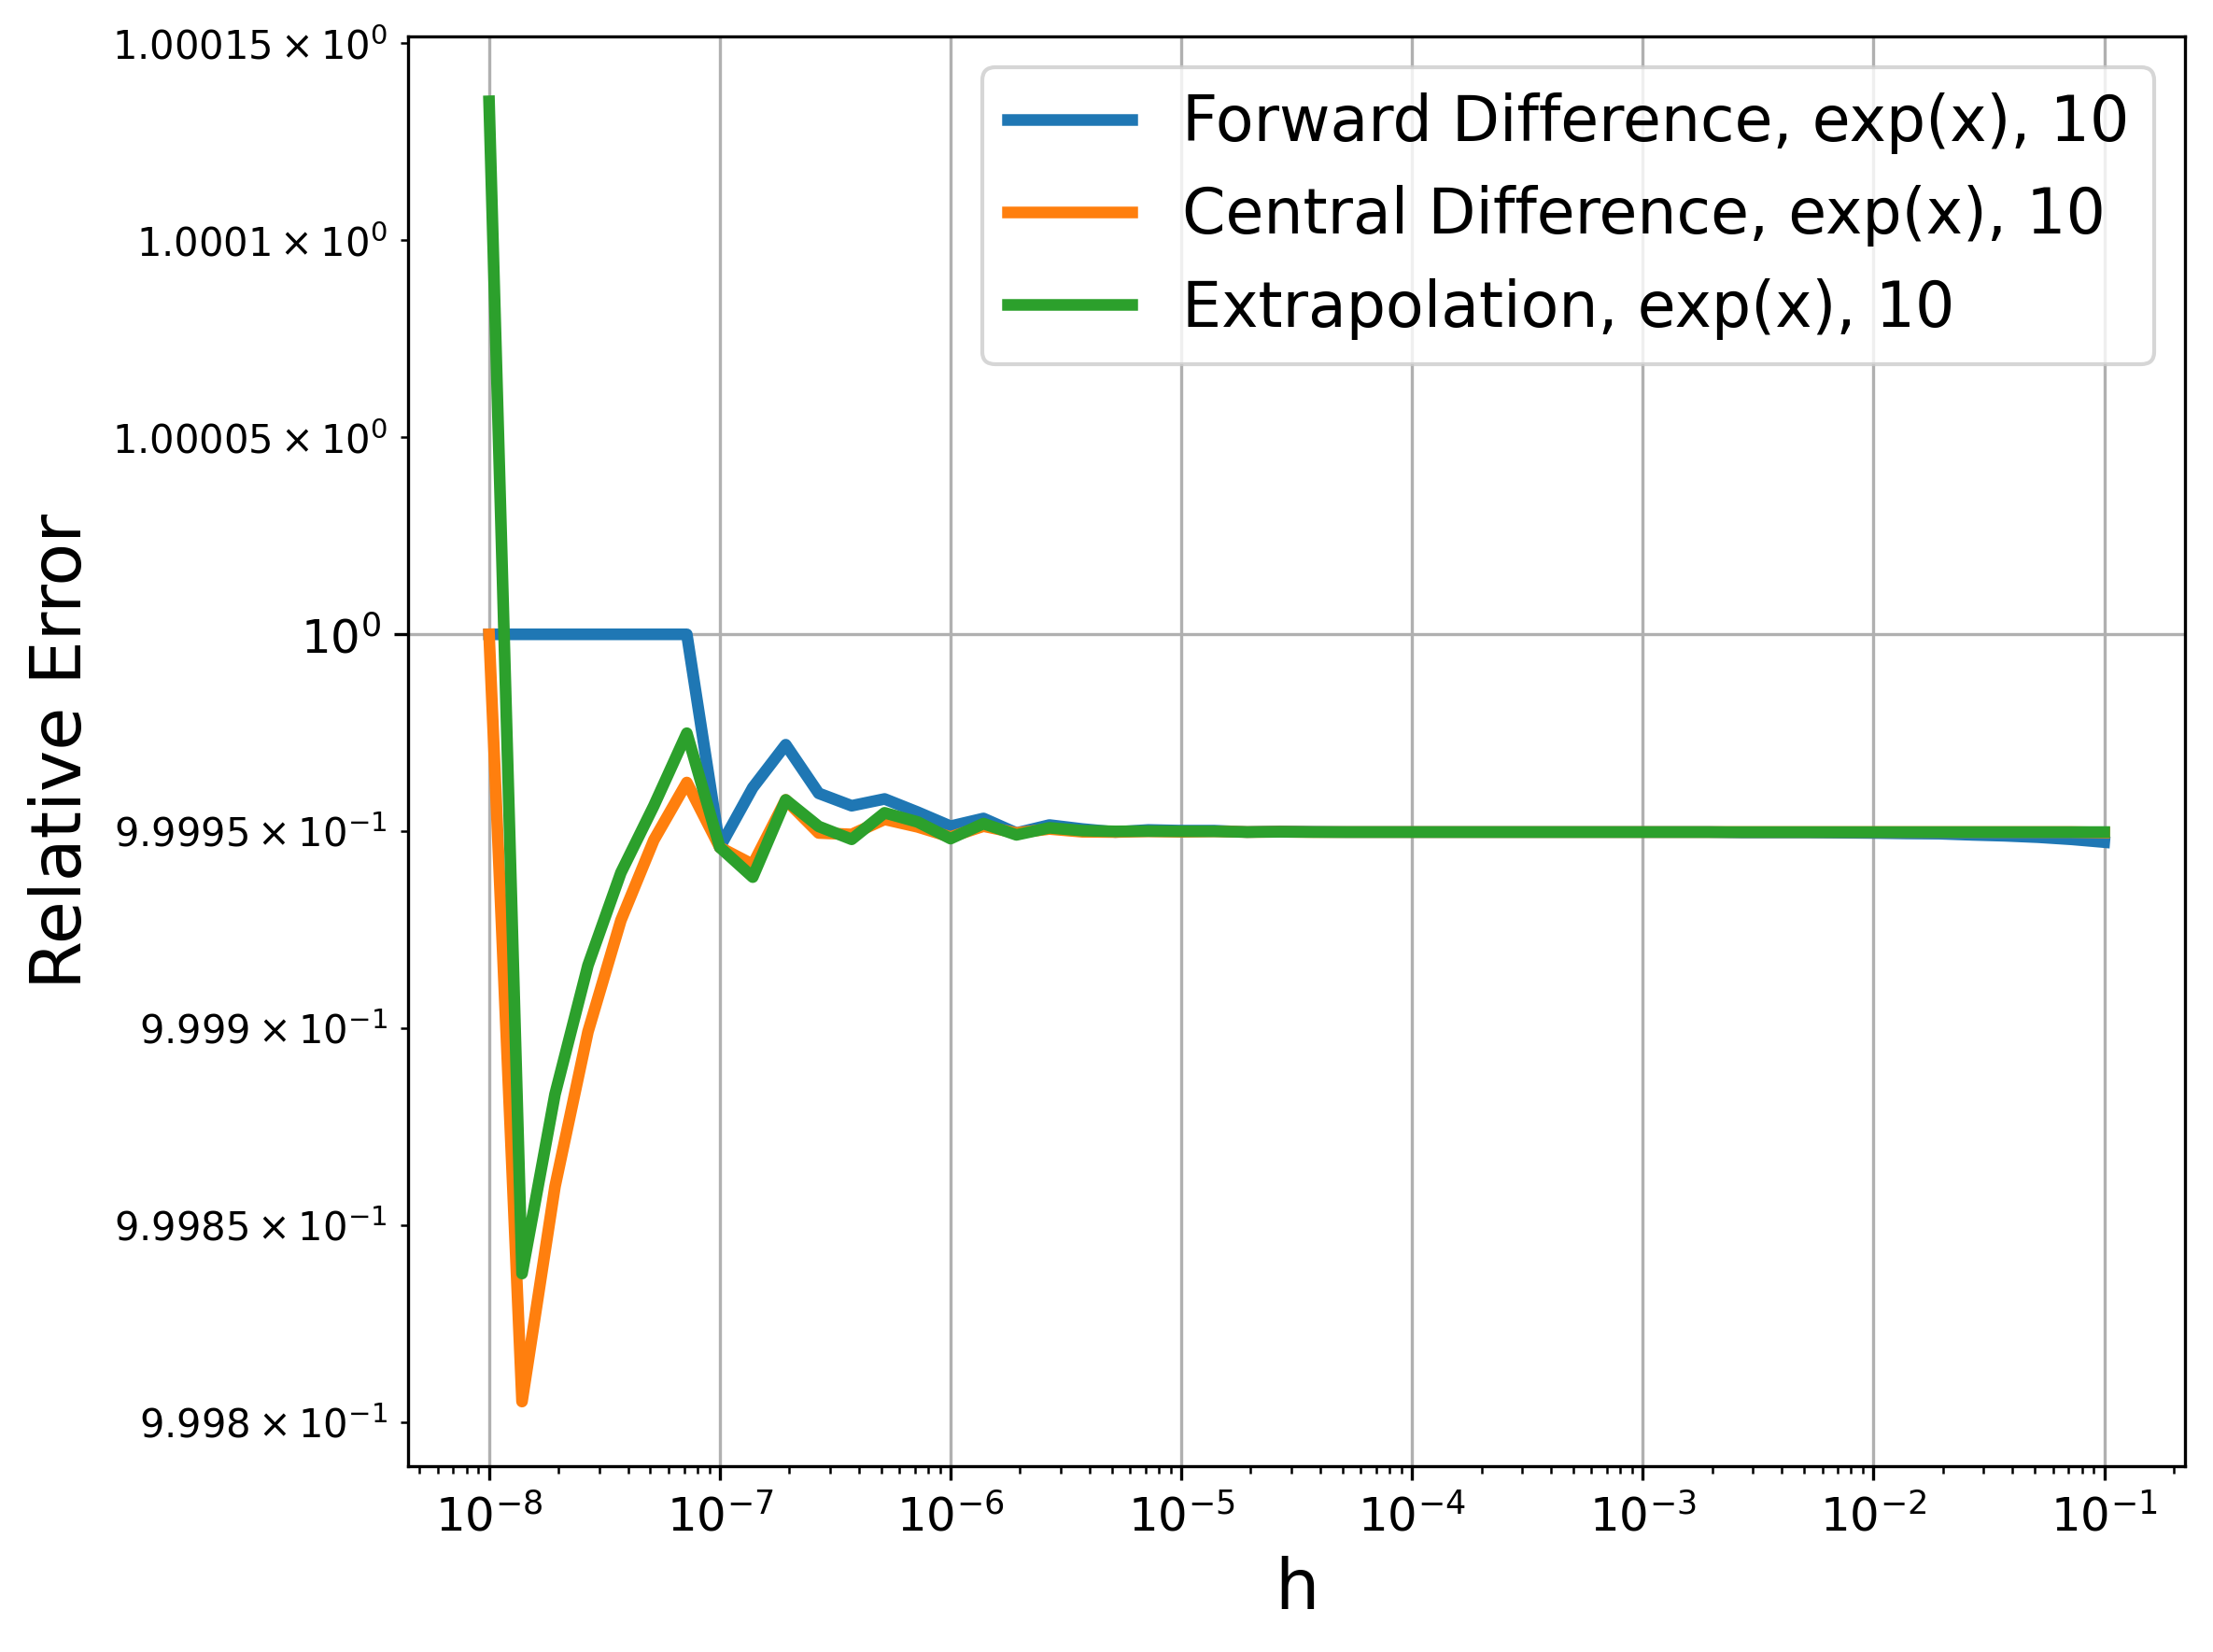

In [4]:
# Now compute derivs for x=10
cos_err_f = np.zeros(len(h))
cos_err_c = np.zeros(len(h))
cos_err_e = np.zeros(len(h))
exp_err_f = np.zeros(len(h))
exp_err_c = np.zeros(len(h))
exp_err_e = np.zeros(len(h))

for i in range(len(h)):
    h_i = np.float32(h[i])
    
    # cos(x)
    cos_f = forward_dif(np.cos, x1, h_i)
    cos_c = central_dif(np.cos, x1, h_i)
    cos_e = extrap(np.cos, x1, h_i)
    cos_err_f[i] = np.abs((cos_f - dcos_10)/dcos_10)
    cos_err_c[i] = np.abs((cos_c - dcos_10)/dcos_10)
    cos_err_e[i] = np.abs((cos_e - dcos_10)/dcos_10)
    
    # exp(x)
    exp_f = forward_dif(np.exp, x1, h_i)
    exp_c = central_dif(np.exp, x1, h_i)
    exp_e = extrap(np.exp, x1, h_i)
    exp_err_f[i] = np.abs((exp_f - dexp_10)/dexp_10)
    exp_err_c[i] = np.abs((exp_c - dexp_10)/dexp_10)
    exp_err_e[i] = np.abs((exp_e - dexp_10)/dexp_10)

# plot for cos(x)
plt.figure(figsize=(8,6), dpi=300)
plt.loglog(h, cos_err_f, label='Forward Difference, cos(x), 10', lw=3)
plt.loglog(h, cos_err_c, label='Central Difference, cos(x), 10', lw=3)
plt.loglog(h, cos_err_e, label='Extrapolation, cos(x), 10', lw=3)
plt.xlabel("h", fontsize=18)
plt.ylabel("Relative Error", fontsize=18)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("dif_cos_10.png")
plt.show()

# plot for exp(x)
plt.figure(figsize=(8,6), dpi=300)
plt.loglog(h, exp_err_f, label='Forward Difference, exp(x), 10', lw=3)
plt.loglog(h, exp_err_c, label='Central Difference, exp(x), 10', lw=3)
plt.loglog(h, exp_err_e, label='Extrapolation, exp(x), 10', lw=3)
plt.xlabel("h", fontsize=18)
plt.ylabel("Relative Error", fontsize=18)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("dif_exp_10.png")
plt.show()

In [49]:
#Problem 2

I_true = np.float32(1 - 1/np.e)

t0 = np.float32(0)
t1 = np.float32(1)

Ns = np.logspace(1,22,base=2,num=22,dtype=int) #ensure even number bins for simpson's rule
mids = np.zeros(len(Ns))
traps = np.zeros(len(Ns))
simps = np.zeros(len(Ns))

e_mids = np.zeros(len(Ns))
e_traps = np.zeros(len(Ns))
e_simps = np.zeros(len(Ns))

def midpoint(f,h,N):
    I_i = np.float32(0.0)
    for i in range(N):
        I_i += f(t0 + (i+0.5)*h)
    I = np.float32(I_i*h)
    err = np.abs((I - I_true)/I_true)
    return I, err

def trap(f,h,N):
    I_i = np.float32(0.0)
    I_i += 1/2*f(t0) + 1/2*f(t1)
    for i in range(1,N):
        I_i += f(t0 + i*h)
    I = np.float32(I_i*h)
    err = np.abs((I - I_true)/I_true)
    return I, err

def simp(f,h,N):
    I_i = np.float32(0.0)
    I_i += f(t0) + f(t1)
    if N % 2 == 1:
        return np.nan, np.nan
    for i in range(1,N,2):
        I_i += 4*f(t0 + i*h)
    for i in range(2,N,2):
        I_i += 2*f(t0 + i*h)
    I = I_i*h/3
    err = np.abs((I - I_true)/I_true)
    return I, err

f = lambda t: np.exp(-t).astype(np.float32)
    
for i, N in enumerate(Ns):
    h = np.float32((t1-t0)/N)
    mids[i], e_mids[i] = midpoint(f,h,N)
    traps[i], e_traps[i] = trap(f,h,N)
    simps[i],  e_simps[i] = simp(f,h,N)

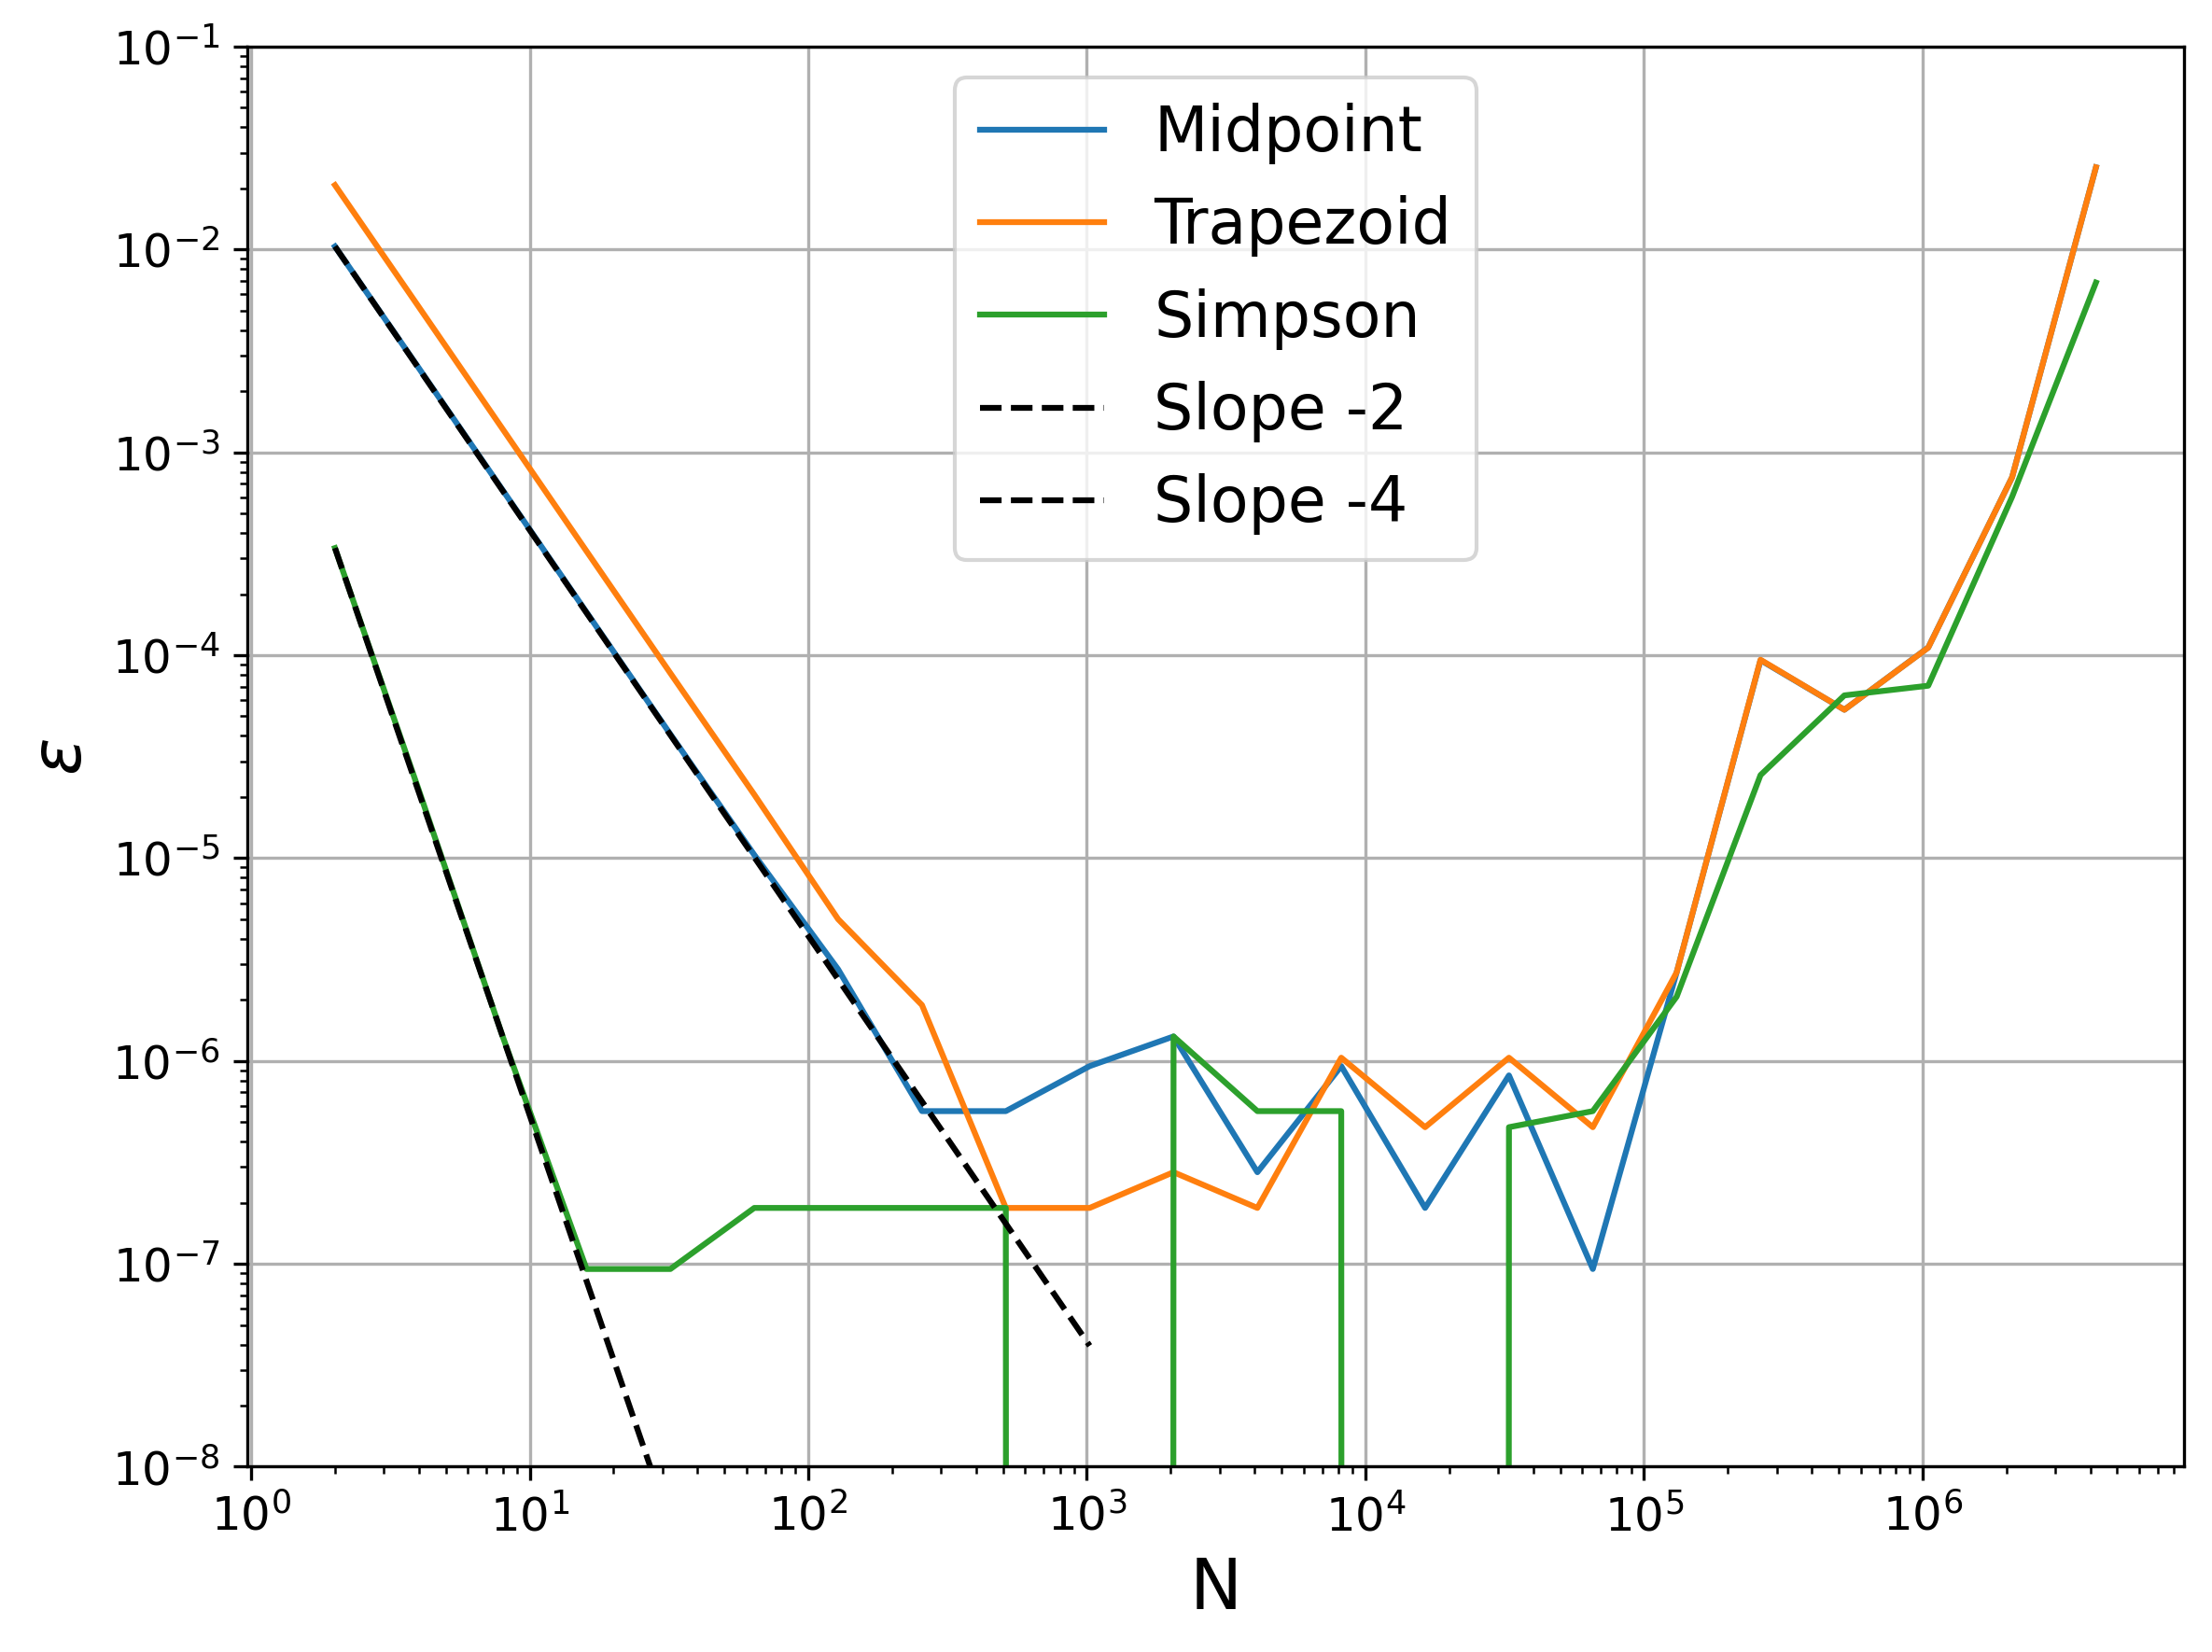

In [83]:
plt.figure(figsize=(8,6),dpi=300)
plt.loglog(Ns,e_mids,label='Midpoint')
plt.loglog(Ns,e_traps,label='Trapezoid')
plt.loglog(Ns,e_simps,label='Simpson')
plt.xlabel("N",fontsize=18)
plt.ylabel(r'$\epsilon$',fontsize=18)
plt.ylim(10e-9,10e-2)
#plt.title("Relative errors for each algorithm",fontsize=16)


#plot the linear fits on the log space
x0 = Ns[0]
y0_mid = e_mids[0]
y0_simp = e_simps[0]
l_mid = y0_mid * (Ns[0:10]/x0)**(-2)
l_simp = y0_simp * (Ns[0:10]/x0)**(-4)
plt.loglog(Ns[0:10],l_mid,"k--",label="Slope -2")
plt.loglog(Ns[0:10],l_simp,"k--",label="Slope -4")
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.grid(True)
plt.savefig("Int_fig.png")

In [71]:
# Problem 3
from scipy.interpolate import InterpolatedUnivariateSpline

data = np.loadtxt("/Users/chris/Desktop/lcdm_z0.matter_pk")
k_vals = data[:,0]
P_vals = data[:,1]
print(k_vals[-1])
Pk_spline = InterpolatedUnivariateSpline(k_vals, P_vals, k=3)

def integrand(k,r):
    return k**2*Pk_spline(k)*np.sinc(k*r/np.pi) #sinc normalized to pi

def new_simp(f,h,N,t0,t1):
    N = int(N)
    I_i = np.float32(0.0)
    I_i += f(t0) + f(t1)
    if N % 2 == 1:
        return np.nan, np.nan
    for i in range(1,N,2):
        I_i += 4*f(t0 + i*h)
    for i in range(2,N,2):
        I_i += 2*f(t0 + i*h)
    I = I_i*h/3
    err = np.abs((I - I_true)/I_true)
    return I, err

1000.0


In [72]:
k0 = 0
k1 = 1000
h = 0.01
N = (k1-k0)/h
if N % 2 != 0:
    N+=1 #ensure even
    
r1=0
r2=120
rs = np.linspace(r1,r2+1,1000)
xi = np.zeros_like(rs,dtype=float)

for i, r in enumerate(rs):
    I , _ = new_simp(lambda k: integrand(k,r),h,N,k0,k1)
    xi[i] = I * 1/(2*np.pi**2)
    
#plt.plot(rs,xi)
#plt.xlabel(r"$r\ [h^{-1}\ \mathrm{Mpc}]$")
#plt.ylabel(r"$\xi(r)$")
#plt.title("Correlation Function from P(k)")
#plt.grid(True)

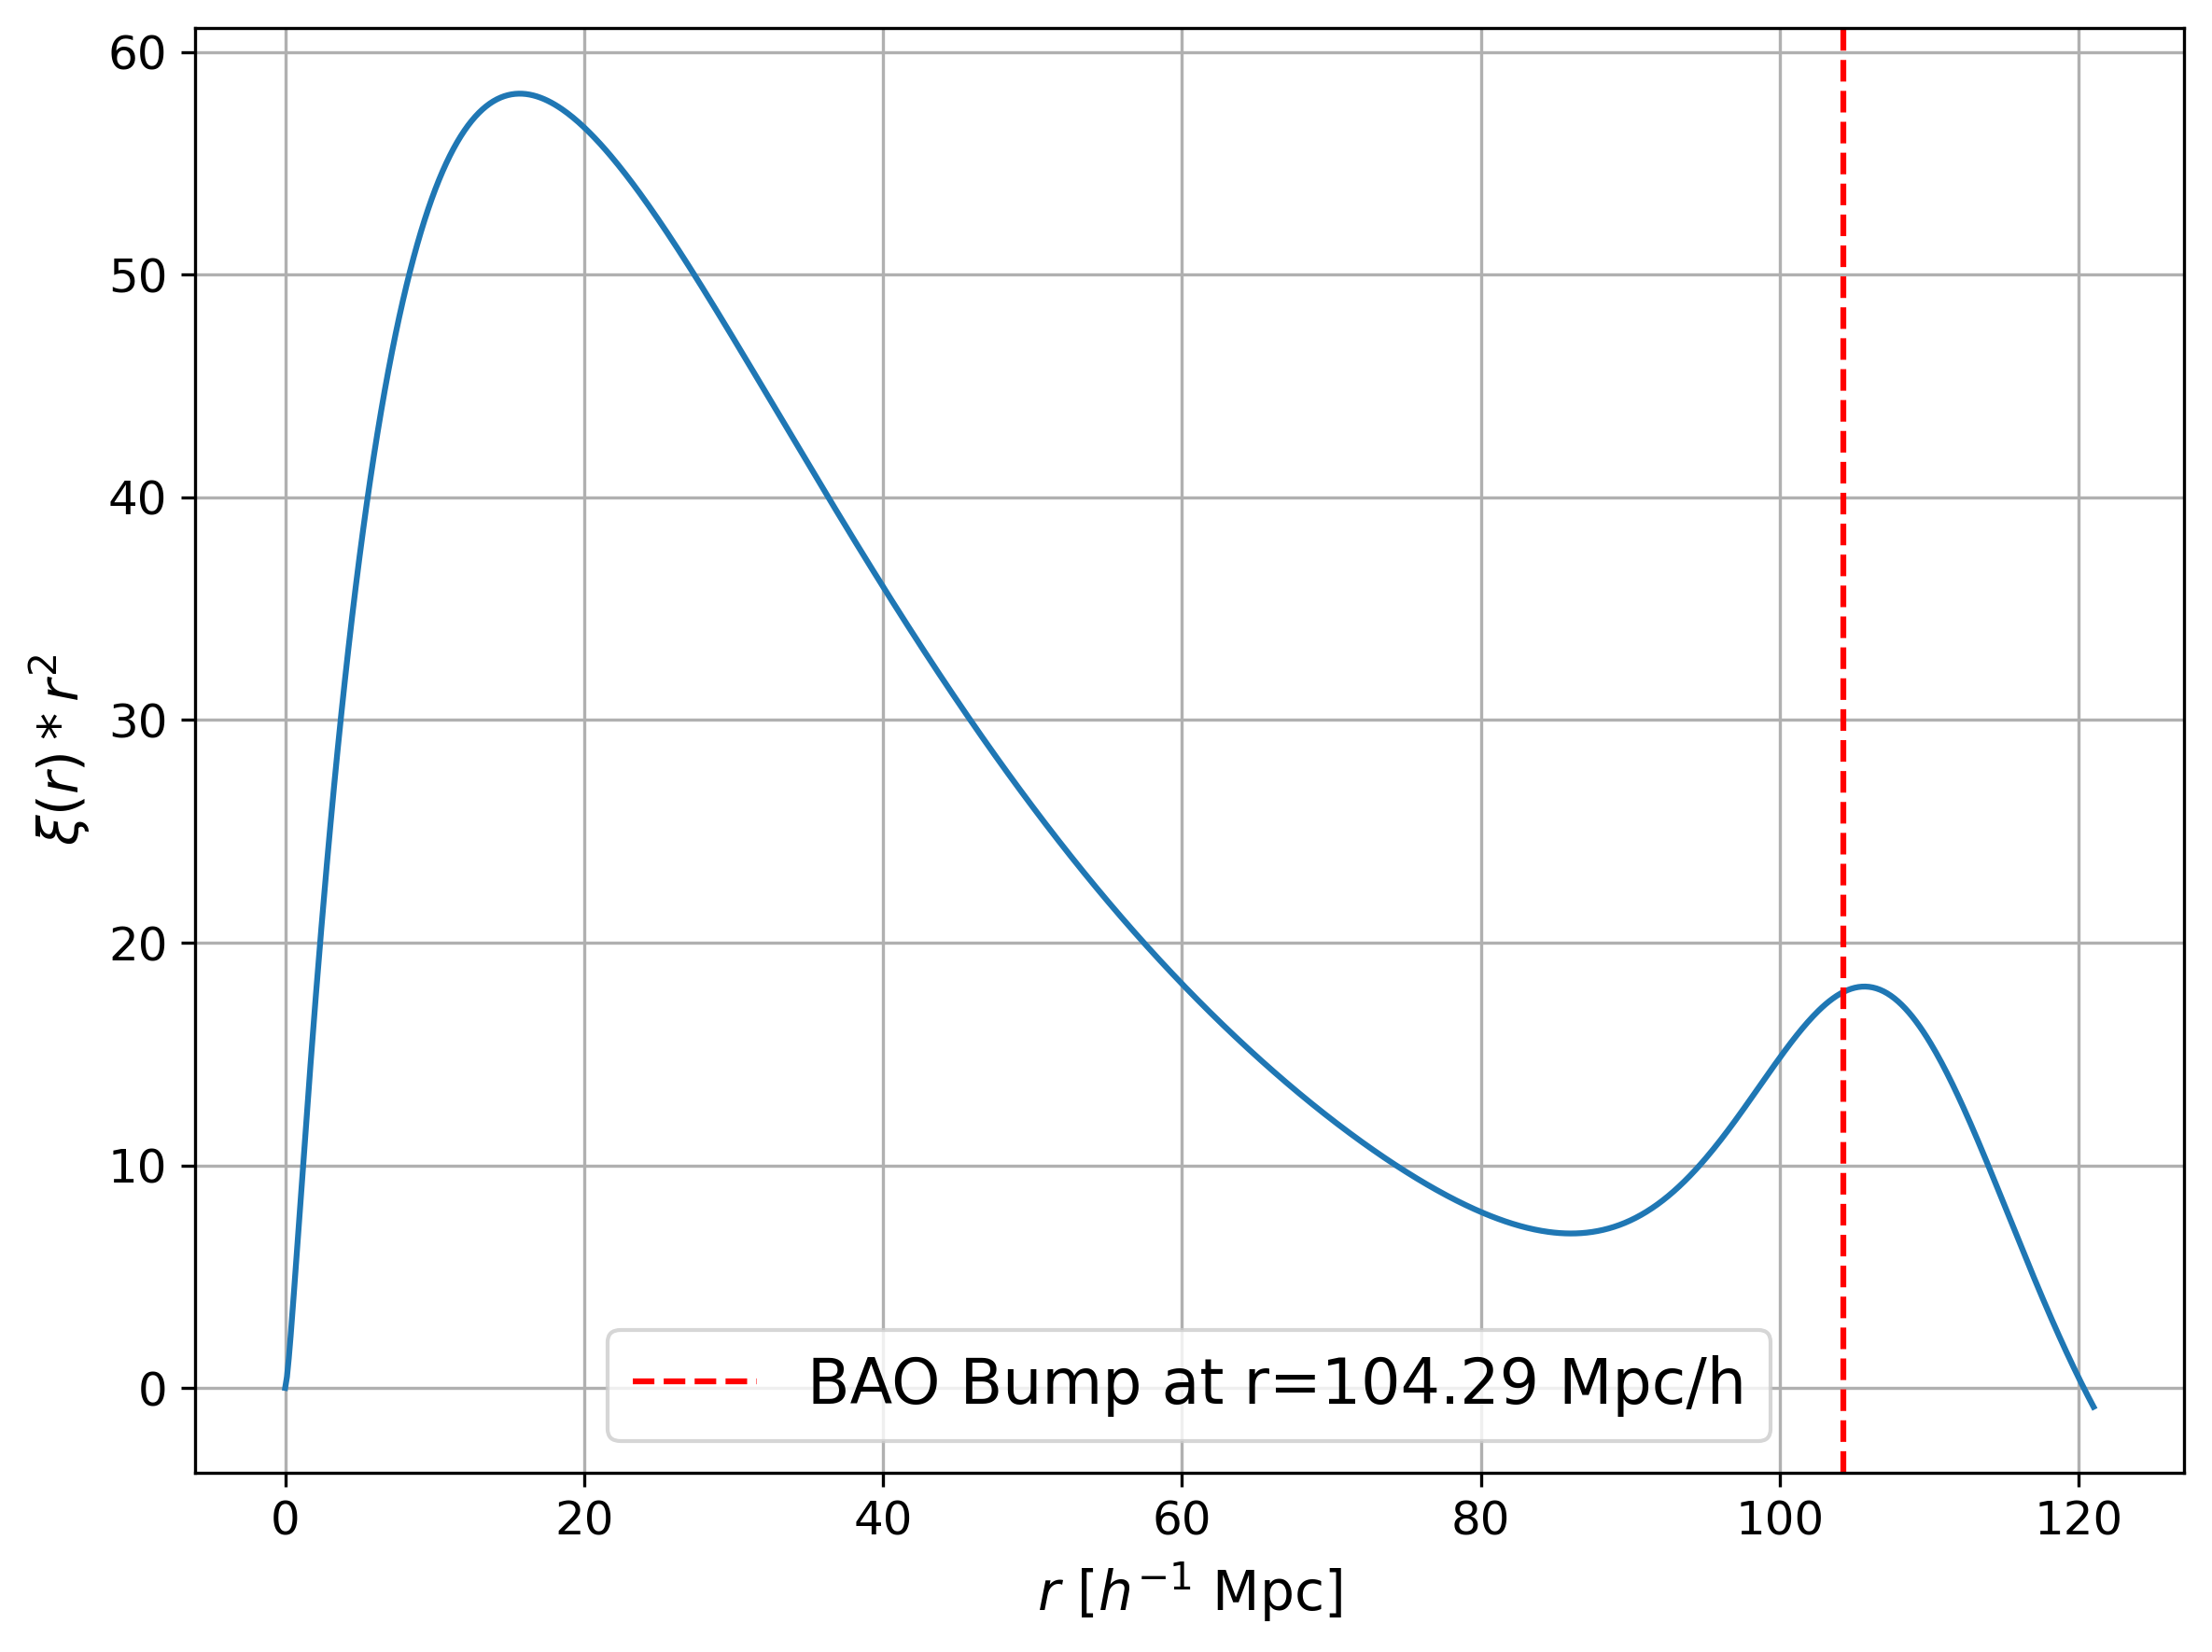

In [80]:
plt.figure(figsize=(8,6),dpi=300)
plt.plot(rs,xi*rs**2)
plt.xlabel(r"$r\ [h^{-1}\ \mathrm{Mpc}]$",fontsize=14)
plt.ylabel(r"$\xi(r)*r^{2}$",fontsize=14)
#plt.title("BAO Bump")
plt.grid(True)

# find max value
mask = (rs >= 100) & (rs <= 110)
bao_i = np.argmax(xi[mask])
bao_r = rs[mask][bao_i]
bao_xi = xi[mask][bao_i]*bao_r**2
plt.axvline(x=bao_r, color='r', linestyle='--',label=f"BAO Bump at r={bao_r:.2f} Mpc/h")
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.savefig("BAO_fig.png")